In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
dados_censo = pd.read_csv('./censo_estadual_2007_a_2022.csv', delimiter=',', encoding='latin-1', low_memory=False)


In [3]:
dados_censo.head(1)

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,IN_FORMA_CONT_PRESTACAO_SERV,IN_FORMA_CONT_COOP_TEC_FIN,IN_FORMA_CONT_CONSORCIO_PUB,IN_TIPO_ATEND_ESCOLARIZACAO,IN_TIPO_ATEND_AC,IN_TIPO_ATEND_AEE,IN_LABORATORIO_EDUC_PROF,IN_SALA_OFICINAS_EDUC_PROF,IN_MATERIAL_PED_PROFISSIONAL,IN_ESCOLARIZACAO
0,0,2007,Nordeste,2,Paraíba,PB,25,Água Branca,2500106,Sertão Paraibano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dados_censo.drop(columns='Unnamed: 0', inplace=True)

In [5]:
dados_censo.rename(
    columns={
    'NU_ANO_CENSO': 'Ano do Censo',
    'NO_UF': 'Nome do Estado',
    'NO_MUNICIPIO':'Nome do Municipio'
},
    inplace=True
)

In [6]:
dados_censo.head(1)

,Ano do Censo,NO_REGIAO,CO_REGIAO,Nome do Estado,SG_UF,CO_UF,Nome do Municipio,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,IN_FORMA_CONT_PRESTACAO_SERV,IN_FORMA_CONT_COOP_TEC_FIN,IN_FORMA_CONT_CONSORCIO_PUB,IN_TIPO_ATEND_ESCOLARIZACAO,IN_TIPO_ATEND_AC,IN_TIPO_ATEND_AEE,IN_LABORATORIO_EDUC_PROF,IN_SALA_OFICINAS_EDUC_PROF,IN_MATERIAL_PED_PROFISSIONAL,IN_ESCOLARIZACAO
0,2007,Nordeste,2,Paraíba,PB,25,Água Branca,2500106,Sertão Paraibano,2501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dados_censo.rename(
    columns={
    'QT_MAT_BAS': 'Educação Básica - Total',
    'QT_MAT_BAS_FEM': 'Educação Básica - Total Feminino',
    'QT_MAT_BAS_MASC':'Educação Básica - Total Masculino',
    'QT_DOC_BAS':'Número de Docentes da Educação Básica'
},
    inplace=True
)

In [8]:
dados_censo = pd.DataFrame(dados_censo)

In [9]:
dados_censo['Ano do Censo'] = pd.to_datetime(dados_censo['Ano do Censo'], format='%Y')

In [10]:
quantitativo_de_escolas = pd.DataFrame(
    {
        'Ano do Censo' : dados_censo['Ano do Censo'].unique(),
        'Numero de Escolas' : dados_censo['Ano do Censo'].value_counts(),
    }
)
quantitativo_de_escolas.rename_axis('', inplace=True)
quantitativo_de_escolas.reset_index(drop=True, inplace=True)
quantitativo_de_escolas

,Ano do Censo,Numero de Escolas
0,2007-01-01,1069
1,2008-01-01,1050
2,2009-01-01,1040
3,2010-01-01,1040
4,2011-01-01,1035
5,2012-01-01,837
6,2013-01-01,789
7,2014-01-01,767
8,2015-01-01,763
9,2016-01-01,735


In [37]:
quantitativo_matriculas = (dados_censo.groupby('Ano do Censo')[['Educação Básica - Total', 'Educação Básica - Total Feminino', 'Educação Básica - Total Masculino', 'Número de Docentes da Educação Básica']].sum())

In [38]:
quantitativo_matriculas

,Educação Básica - Total,Educação Básica - Total Feminino,Educação Básica - Total Masculino,Número de Docentes da Educação Básica
Ano do Censo,,,,
2007-01-01,451037.0,239644.0,211393.0,17248.0
2008-01-01,435385.0,231173.0,204212.0,17722.0
2009-01-01,397444.0,210592.0,186852.0,18044.0
2010-01-01,387970.0,204327.0,183643.0,18364.0
2011-01-01,376505.0,197118.0,179387.0,18214.0
2012-01-01,354690.0,186431.0,168259.0,17787.0
2013-01-01,331529.0,173966.0,157563.0,17759.0
2014-01-01,315912.0,165448.0,150464.0,17442.0
2015-01-01,292869.0,151258.0,141611.0,16425.0


<Axes: xlabel='Ano do Censo', ylabel='Educação Básica - Total'>

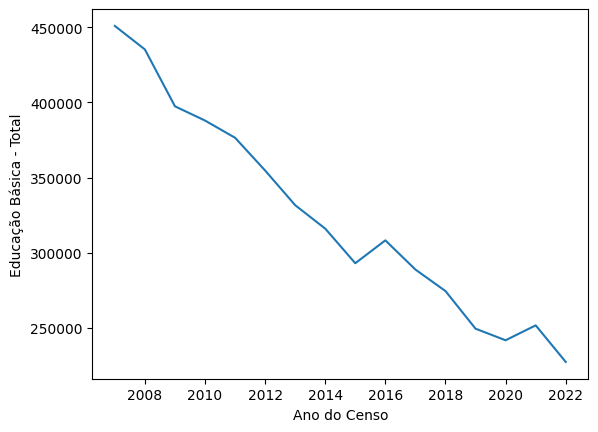

In [13]:
sns.lineplot(data=quantitativo_matriculas, x=quantitativo_matriculas.index, y=quantitativo_matriculas['Educação Básica - Total'])

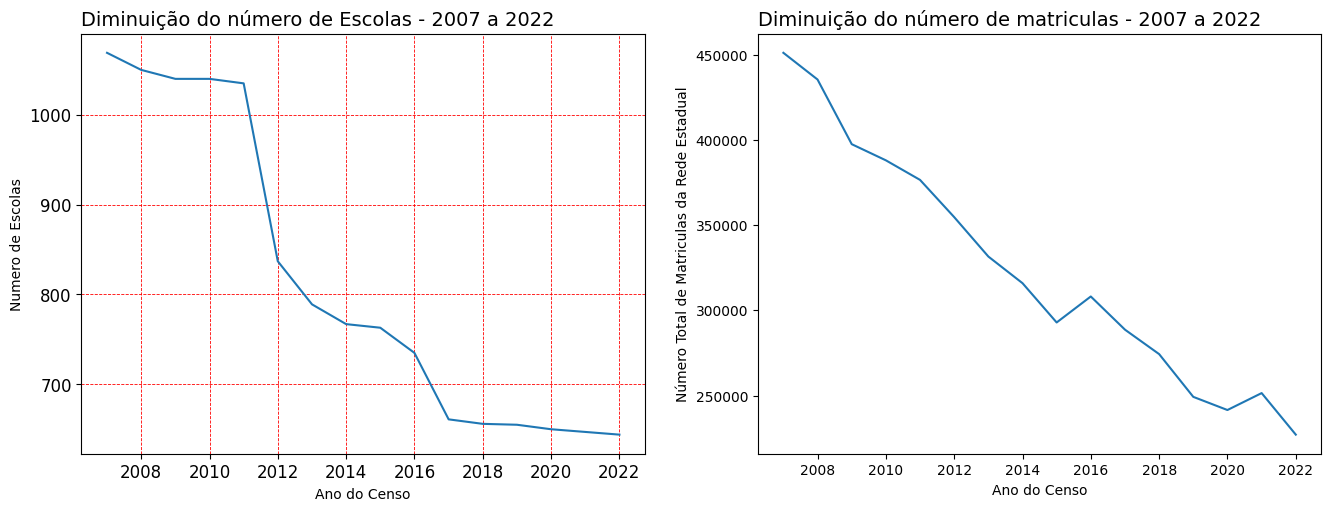

In [14]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(2,2,1)
ax.set_title('Diminuição do número de Escolas - 2007 a 2022', fontsize=14, loc='left')
ax.grid(color='r', linestyle='--', linewidth=0.6)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)



sns.lineplot(data=quantitativo_de_escolas, x='Ano do Censo', y='Numero de Escolas')
ax = plt.subplot(2,2,2)
ax.set_title('Diminuição do número de matriculas - 2007 a 2022', fontsize=14, loc='left')
ax.set_ylabel('Número Total de Matriculas da Rede Estadual')
sns.lineplot(data=quantitativo_matriculas, x=quantitativo_matriculas.index, y=quantitativo_matriculas['Educação Básica - Total'])
ax = ax

In [18]:
quantitativo_de_escolas.set_index(quantitativo_de_escolas['Ano do Censo'], inplace=True)

In [20]:
quantitativo_de_escolas.drop(columns='Ano do Censo', inplace=True)

In [21]:
quantitativo_de_escolas

,Numero de Escolas
Ano do Censo,
2007-01-01,1069
2008-01-01,1050
2009-01-01,1040
2010-01-01,1040
2011-01-01,1035
2012-01-01,837
2013-01-01,789
2014-01-01,767
2015-01-01,763


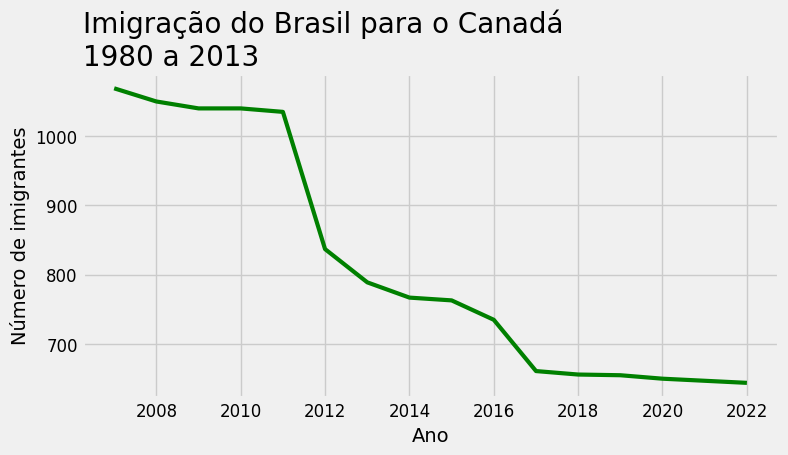

In [27]:

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.plot(quantitativo_de_escolas['Numero de Escolas'], lw=3, color='g')
  ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
  ax.set_ylabel('Número de imigrantes', fontsize=14)
  ax.set_xlabel('Ano', fontsize=14)
  ax.yaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_tick_params(labelsize=12)
  plt.show()

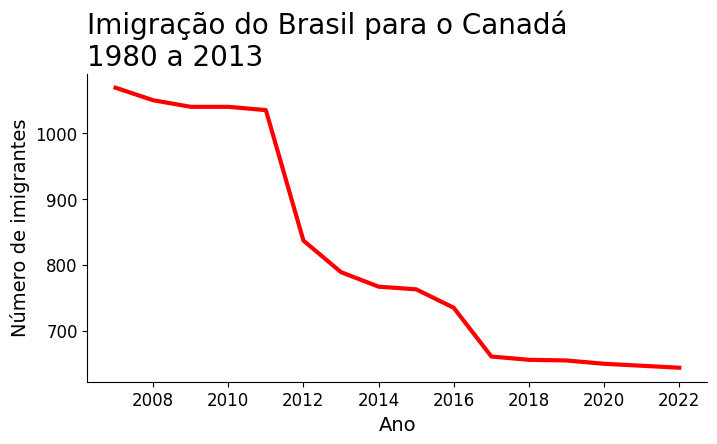

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(quantitativo_de_escolas['Numero de Escolas'], lw=3, color='r')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

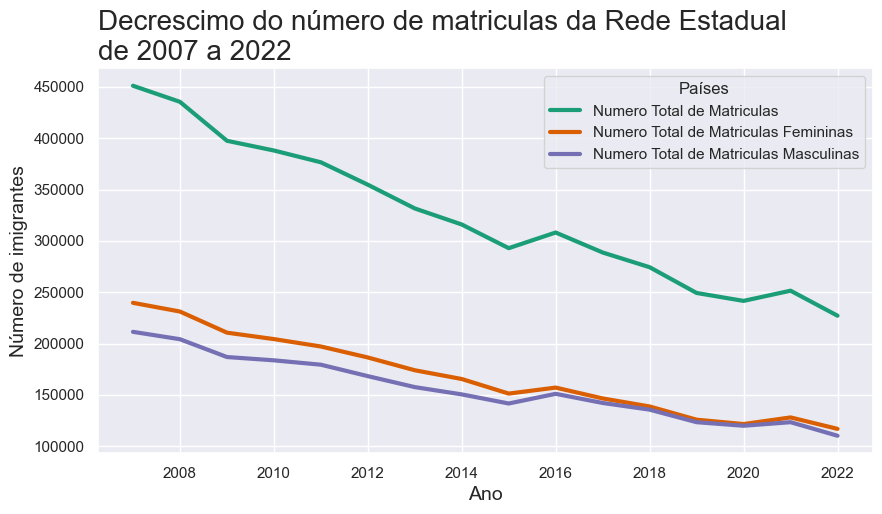

In [42]:
sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(quantitativo_matriculas['Educação Básica - Total'], lw=3, label='Numero Total de Matriculas')
ax = sns.lineplot(quantitativo_matriculas['Educação Básica - Total Feminino'], lw=3, label='Numero Total de Matriculas Femininas')
ax = sns.lineplot(quantitativo_matriculas['Educação Básica - Total Masculino'], lw=3, label='Numero Total de Matriculas Masculinas')
ax.set_title('Decrescimo do número de matriculas da Rede Estadual\nde 2007 a 2022', loc='left', fontsize=20)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)



ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.0, 1.0))

plt.show()